In [45]:
from sklearn import datasets, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10, 5)})

# Step 1 
Import	the	Iris	Dataset	from	SciKitLearn. 

In [46]:
# Load Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
outcomes = iris.target_names
titles = iris.feature_names

# Import iris data set into a dataframe 
df = pd.DataFrame(np.c_[iris['data'], iris['target']],columns=iris['feature_names'] + ['class'])

# Step 2
I will use "sklearn.metrics.calinski_harabasz_score" to get the ratio between the within-cluster dispersion and the between-cluster dispersion. 

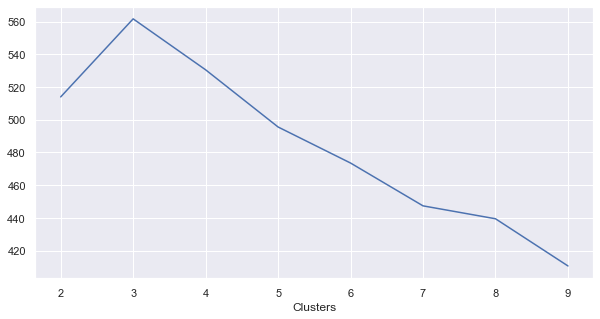

In [47]:
ch = []

for k in range (2, 10):
    k_means = KMeans(n_clusters=k, random_state=1000)
    y_kmeans = k_means.fit_predict(iris.data)

    labels = k_means.labels_
    ch.append(calinski_harabasz_score(iris.data, labels))

ax = sns.lineplot(range(2, 10), ch)
ax.set(xlabel='Clusters')
plt.show()

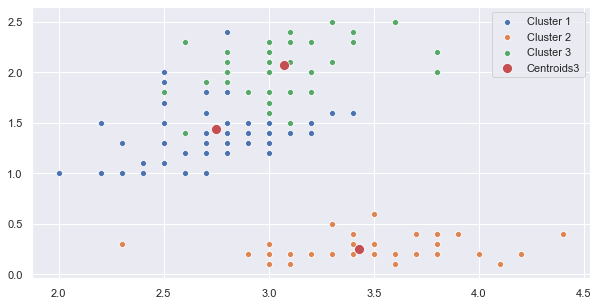

In [54]:
# from the graph above we can that at cluster 3 we see the biggest rate change, so we will have 3 clusters.

# Using KMeans function we get the clusters
k_means = KMeans(n_clusters=3, random_state=0)
y_kmeans = k_means.fit_predict(X)
clusters = np.unique(k_means.labels_)
centroids = k_means.cluster_centers_

# Plot the clusters
for n in clusters:
    sns.scatterplot(X[y_kmeans == n, 1], X[y_kmeans == n, 3], label="Cluster " + str(n+1))
    
# Plot the centroids
sns.scatterplot(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 3], s=100, label="Centroids" + str(n+1))
plt.show()
